# Python Coursework: Javis March Algorithm

Convex hulls are widely used in various fields: mathematics, combinatorial optimization, geometric etc.. Applications such as shape analysis or vehicle collision avoidance are all based on the construction of convex hull. There are many different algorithms exsiting to help us find the convex hull of a given set of points in the plane (i.e Graham's Scan algorthm, Javis March Algorithm), in this report, I will be mainly introducing and implementing the Javis March Algorithm

In [1]:
from plotnine import *
import pandas as pd
import numpy as np
import csv
import time
import matplotlib.pyplot as plt
%matplotlib inline
import random

#Import all the packages for further use 

## Pseudo Code Version 1 (given):
S is a given set of points in a plane. p, q and r are points in S.
1. Initialise p as leftmost points.
2. Do following while we do not come back to the first (or leftmost) point.
    1. The next point q is the point such that the triplet (p,q,r) is counterclockwise for any other point r.
    2. Next p = q (Store q as next of p in the output convex hull).
    3. p = q (Set p as q for next iteration)
  

## Pseudo Code Version 2 (corresponds to the following algorithm code):
The basic idea behind Javis March algorithm is to sort and select points in the given set. We find the leftmost point in each iteration based on the comparision of directions and then add the point to our convex hull list. The following is the detailed pseudo code that represents the working process of Jarvis March algorithm.

S is a given set of points in a plane, let p, q and r be the points in S.

* From the given set S, we delete the repeated points in S.
* With the updated S' (containing only unique points), we then check if the number of points is enough to form a convex hull. If it is not, give the error message, otherwise continue the algorithm.
* From S', we find the point p1 with minimum x-axis value (the leftmost point). If there exists multiple points with same minimum x-axis value, we pick the one with maximum y-axis value. 
* Set current p = p1, q = None.
* $\textbf{While q $\neq$ p, do the following:}$ (The while loop only breaks when the convex hull is closed)
    * Add p to the convex hull list.
    * Let q be some point other than p in S'.
    * $\textbf{For all r in S', do the following:}$
        * $\textbf{If}$ p-r-q is clockwise: continue;
        * $\textbf{Else if}$ p-r-q is conterclockwise: update q = r;
        * $\textbf{Else if}$ (else) p-r-q are collinear:
            * $\textbf{If}$ |r-p| < |q-p|: continue;
            * $\textbf{Else if}$ (else) |r-p| $\geq$ |q-p|: update q = r.
        
        Explanation of the for loop above: From current p, we go counterclockwise and find the next point of the convex hull which is the most conterclockwise with respect to p. To do this, we initiate q as a point other than p in S' (In the following algorithm, we pick the next index following p, e.g if p is the last point in S', then q will be the first point in S'; if p is the first point in S', then q will be the second point in S'), and we are aiming to check if there's no other points r in S' other than p and q such that p-r-q is in the conterclockwise position. To achieve this, we create a for loop to go through all the r in S', update q to be r if p-r-q is in the conterclockwise position. In the case of when p-r-q are collinear, we only update our q to be r when the distance between p and r is larger than the distance between p and q. By doing this, we will find q which is located at the most conterclockwise position from p.
        
    * Let current p = q.


-- Within the Jarvis March algorithm, p-r-q position (whether clockwise or conterclockwise) is determined using the cross product of vector $\vec{pq}$ and $\vec{pr}$. We have cross product for two vector p1 and p2 as (p1.x)$\times$(p2.y) - (p2.x)$\times$(p1.y), therefore the cross product for vector $\vec{pq}$ and $\vec{pr}$ is the following:
#### <center> (r.x-p.x)$\times$(q.y-p.y) - (q.x-p.x)$\times$(r.y-p.y) </center>
If the cross product value is negative, that means p-r-q is the conterclockwise position and if the value is positive, p-r-q is in the clockwise position; if the value is 0, that means p-r-q are collinear.

-- The following four plots is a simple example indicating for a certain p how q (the most conterclockwise point) is detected: (Red point is p, yellow point is q and green point is r)

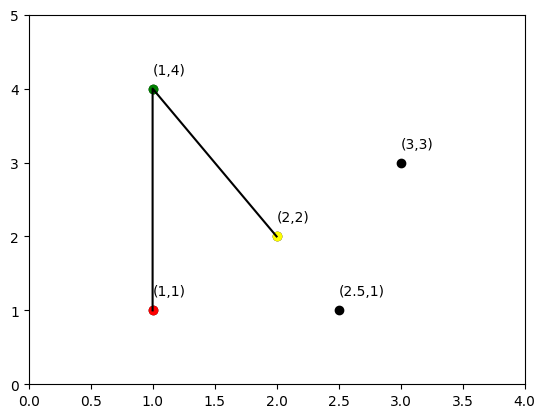

In [2]:
x = [1,2,1,3,2.5]
y = [1,2,4,3,1]
text = ["(1,1)", "(2,2)", "(1,4)", "(3,3)", "(2.5,1)"]
plt.scatter(x, y,c='black')
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
plt.xlim((0, 4))
plt.ylim((0, 5))
plt.scatter(1, 1, c ='red')
plt.scatter(2, 2, c ='yellow')
plt.scatter(1, 4, c ='green')
point1 = [1, 1]
point2 = [1, 4]
point3 = [2, 2]
x_values = [point1[0], point2[0], point3[0]]
y_values = [point1[1], point2[1], point3[1]]
plt.plot(x_values, y_values,c='black')
plt.show()

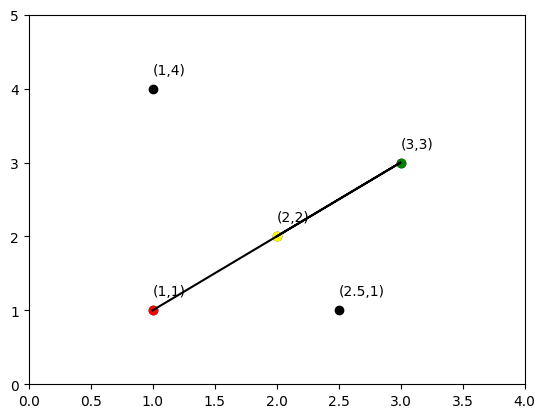

In [3]:
plt.scatter(x,y,c='black')
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
plt.xlim((0, 4))
plt.ylim((0, 5))
plt.scatter(1, 1, c ='red')
plt.scatter(3, 3, c ='green')
plt.scatter(2, 2, c ='yellow')
point1 = [1, 1]
point2 = [3, 3]
point3 = [2, 2]
x_values = [point1[0], point2[0], point3[0]]
y_values = [point1[1], point2[1], point3[1]]
plt.plot(x_values, y_values,c='black')
plt.show()

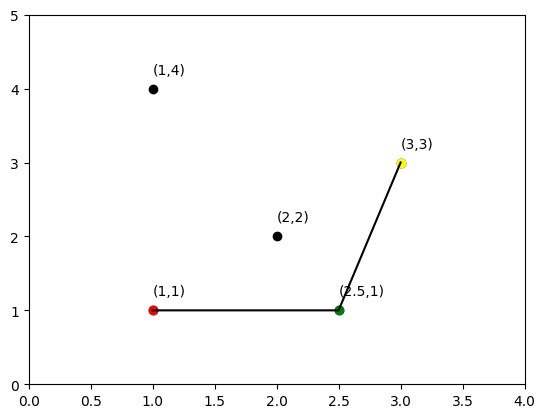

In [4]:
plt.scatter(x,y,c='black')
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
plt.xlim((0, 4))
plt.ylim((0, 5))
plt.scatter(1, 1, c ='red')
plt.scatter(2.5, 1, c ='green')
plt.scatter(3, 3, c ='yellow')
point1 = [1, 1]
point2 = [2.5, 1]
point3 = [3, 3]
x_values = [point1[0], point2[0], point3[0]]
y_values = [point1[1], point2[1], point3[1]]
plt.plot(x_values, y_values,c='black')
plt.show()

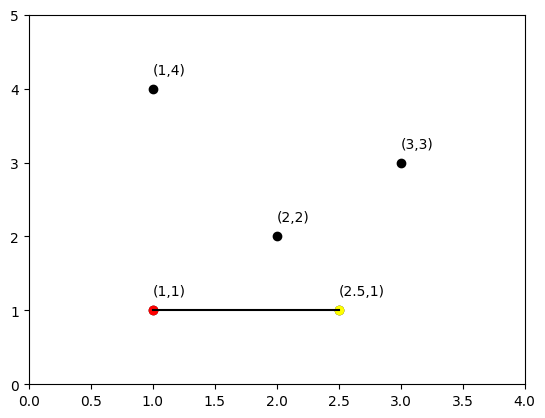

In [5]:
plt.scatter(x,y,c='black')
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
plt.xlim((0, 4))
plt.ylim((0, 5))
plt.scatter(1, 1, c ='red')
plt.scatter(2.5, 1, c ='yellow')
point1 = [1, 1]
point2 = [2.5, 1]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,c='black')
plt.show()

### Comparison of pseudo code 1 and pseudo code 2:

The pseudo code 1 which is provided in the assigment sheet is quite vague and missing many details that might cause different understanding of the algorithm, the pseudo code 2 is a modified version of my understanding towards pseudo code 1. Some of the missing details are explained in pseudo code 2, for example what kind of node is defined as the leftmost point, and what does the conterclockwise with respect to. In addition, some special scenarios are covered in pseudo code 2, for example when collinear points exist in the input set. Also the pseudo code only gives general instruction of how to decide q as our next p, but more reasonings and methods are briefly introduced in pseudo code 2. Some of the ideas (Finding the direction) are inspired by the post here: https://www.geeksforgeeks.org/convex-hull-using-jarvis-algorithm-or-wrapping/

In [6]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [7]:
def ccw(a, b, c):
    m1 = (b.y - a.y)*(c.x - b.x)
    m2 = (b.x - a.x)*(c.y - b.y)
    return (m1 - m2)

def uniquee(Points, n):
    pts = []
    xx = []
    yy = []
    for i in range(n):
        xx.append(Points[i].x)
        yy.append(Points[i].y)
    
    df = pd.DataFrame({"X": xx, "Y": yy})
    dfc =  df.drop_duplicates()
    nrow = dfc.shape[0]
    dfc = dfc.reset_index(drop=True)
    for j in range(nrow):
        pts.append(Point(dfc.X[j], dfc.Y[j]))
    return (pts)



def javis_march(Points):
    n = len(Points)
    Points = uniquee(Points,n) # Drop the duplicates in the given points set.
    # The minimum number of points to form a convex hull is 3.
    if n <= 2:
        print('The number of the points are not enough to form a convex hull!')
        return
    Hull = [] # List to record the index of the convex hull 
    # Initialise p as leftmost point. (minimum x-coordinates)(p is a point in convex hull)
    n = len(Points)
    p1 = 0
    for i in range(1, n):
        if Points[i].x < Points[p1].x:
            p1 = i # Update p 
        elif Points[i].x == Points[p1].x:
            if Points[i].y > Points[p1].y:
                '''
                Update p if two points have same x-axis, 
                we pick the one with larger y-axis as our first point in the convex hull.
                '''
                p1 = i         
    p = p1
    q = None
    while(True):
        Hull.append(p) # Append the current point p in the Hull index list
        if p == n-1:
            q = 0
        else:
            q = p + 1 # Initiate q as the next index (index+1) or 0 if p is the last point's index
        for r in range(n):
            d = ccw(Points[p], Points[r], Points[q]) # Calculating the orientation (angle) of the triplet.
            disa = (Points[r].x - Points[p].x)**2 +(Points[r].y - Points[p].y)**2
            disb = (Points[q].x - Points[p].x)**2 +(Points[q].y - Points[p].y)**2 # Calculatiung the distance in case of the collinearity
            if d < 0 or (d == 0 and disa > disb): 
                
                '''for all the points r in the points set, if r is counterclockwise, 
                we update q as r, if there's collinearity, 
                we consider the farthest point''' 
                
                q = r
        p = q # Update our next p to be the current q, since q is the most counterclockwise wrt the last p.
        if (p == p1): # When the first p is detected again, we stop the algorithm 
            Hull.append(p1) # The first p is added to the hull list again for the convenience of checking the convex hull is closed.
            break
    for ind in Hull:
        print(Points[ind].x, Points[ind].y)
    
    return Hull
            
 



# Implementation: tests on 4 given datasets

The return convex hull output contains the first (leftmost) points twice, appearing at the beginning and ending of the list, just to check the convex hull is closed and make it more convenient to plot.

## Line

In [8]:
pointsline = []
with open('line.csv') as file:
    reader = csv.DictReader(file)
    for row in csv.reader(file):
        x, y = row
        pointsline.append(Point(float(x),float(y)))

dfln = pd.read_csv("line.csv", delimiter =",",header=None)
dfln.columns = ['X', 'Y']
dfln

X  Y
0  1  1
1  2  2
2  3  3

1.0 1.0
3.0 3.0
1.0 1.0


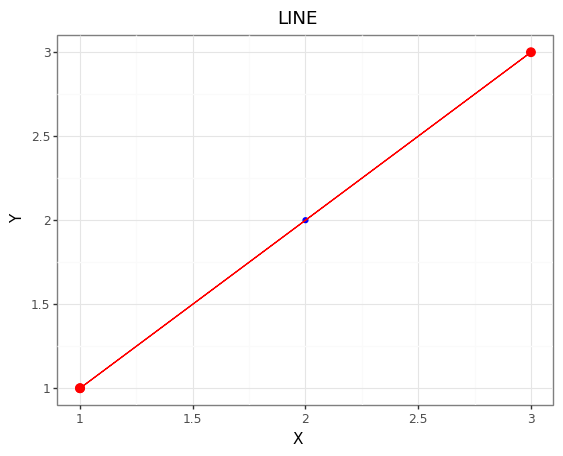

<ggplot: (8733123567171)>

In [9]:
resultln = javis_march(pointsline)
Xresln = np.array(dfln.X[resultln])
Yresln = np.array(dfln.Y[resultln])
dfresln = pd.DataFrame({"Xres" : Xresln,"Yres" : Yresln})
pln1 = ggplot() + geom_point(dfln, aes(x='X', y='Y'), color='blue')+ geom_point(dfresln, aes(x="Xres", y="Yres"),color='red',size=3) + geom_path(dfresln, aes(x = "Xres", y = "Yres"),color = 'red') + labs(title = "LINE",x = "X", y = "Y")+ theme_bw()
pln1

## Random

In [10]:
pointsrandom = []
with open('random.csv') as file:
    reader = csv.DictReader(file)
    for row in csv.reader(file):
        x, y = row
        pointsrandom.append(Point(float(x),float(y)))

dfrd = pd.read_csv("random.csv", delimiter =",",header=None)
dfrd.columns = ['X', 'Y']
dfrd

X         Y
0    0.237561  0.765068
1   -0.196668  1.058185
2   -0.403757  0.906347
3   -0.015824  0.637454
4   -0.716574  1.202197
..        ...       ...
195  0.147535  0.731833
196  0.049885  1.116387
197  0.037944  1.184668
198  0.058217  0.788949
199  0.029487  1.130488

[200 rows x 2 columns]

-0.71657388106957 1.20219702232312
-0.605200231305254 0.957134110706781
-0.432249029757549 0.600185398765638
0.156196864138666 0.537196258340319
0.353922330922547 0.654945271536898
0.505823570824408 1.12001307650065
0.358984412999769 1.56677311480003
-0.380951747864001 1.45310545712829
-0.545292317957066 1.4050365090573
-0.71657388106957 1.20219702232312


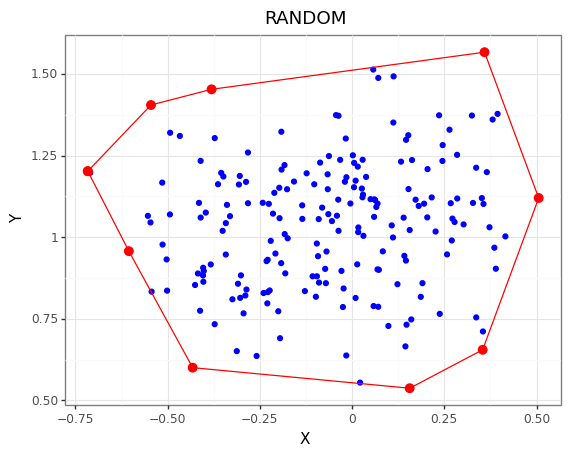

<ggplot: (8733123509830)>

In [11]:
resultrd = javis_march(pointsrandom)
Xresrd= np.array(dfrd.X[resultrd])
Yresrd = np.array(dfrd.Y[resultrd])
dfresrd = pd.DataFrame({"Xres" : Xresrd,"Yres" : Yresrd})
pln2 = ggplot() + geom_point(dfrd, aes(x='X', y='Y'), color='blue')+ geom_point(dfresrd, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfresrd, aes(x = "Xres", y = "Yres"),color = 'red')+ labs(title = "RANDOM",x = "X", y = "Y")+ theme_bw()
pln2

## Square

In [12]:
pointssquare = []
with open('square.csv') as file:
    reader = csv.DictReader(file)
    for row in csv.reader(file):
        x, y = row
        pointssquare.append(Point(float(x),float(y)))

dfsq = pd.read_csv("square.csv", delimiter =",",header=None)
dfsq.columns = ['X', 'Y']
dfsq

X    Y
0  1.0  1.0
1  2.0  1.0
2  2.0  2.0
3  1.0  2.0
4  1.5  1.5
5  1.5  2.5

1.0 2.0
1.0 1.0
2.0 1.0
2.0 2.0
1.5 2.5
1.0 2.0


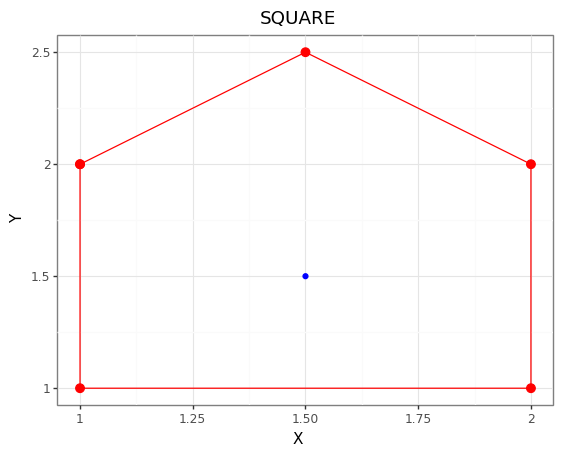

<ggplot: (8733123483266)>

In [13]:
resultsq = javis_march(pointssquare)
Xressq= np.array(dfsq.X[resultsq])
Yressq = np.array(dfsq.Y[resultsq])
dfressq = pd.DataFrame({"Xres" : Xressq,"Yres" : Yressq})
pln3 = ggplot() + geom_point(dfsq, aes(x='X', y='Y'), color='blue')+ geom_point(dfressq, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfressq, aes(x = "Xres", y = "Yres"),color = 'red')+ labs(title = "SQUARE",x = "X", y = "Y")+ theme_bw()
pln3

## parallelogram (trapezoid) 

In [14]:
dfpg = pd.read_csv("pgram.csv", delimiter =",",header=None)
dfpg.columns = ['X', 'Y']
nrow = dfpg.shape[0]
pointspgram = []
for i in range(nrow):
    pointspgram.append(Point(float(dfpg.X[i]), float(dfpg.Y[i])))
dfpg

X    Y
0  1.0  1.0
1  2.0  1.0
2  3.0  2.0
3  2.0  2.0
4  2.0  1.5
5  2.5  2.5

1.0 1.0
2.0 1.0
3.0 2.0
2.5 2.5
1.0 1.0


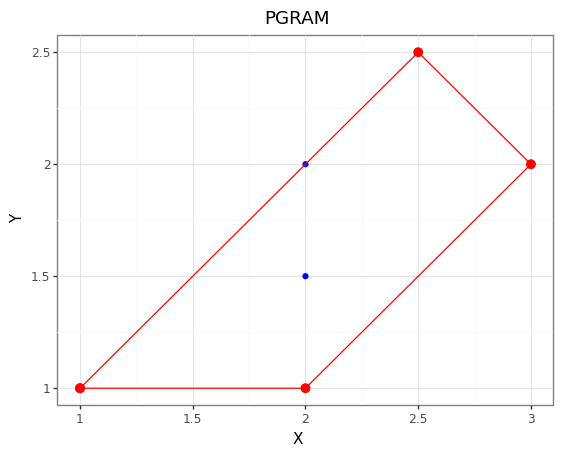

<ggplot: (8733123490699)>

In [15]:
resultpg = javis_march(pointspgram)
Xrespg= np.array(dfpg.X[resultpg])
Yrespg = np.array(dfpg.Y[resultpg])
dfrespg = pd.DataFrame({"Xres" : Xrespg,"Yres" : Yrespg})
pln4 = ggplot() + geom_point(dfpg, aes(x='X', y='Y'), color='blue')+ geom_point(dfrespg, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfrespg, aes(x = "Xres", y = "Yres"),color = 'red')+ labs(title = "PGRAM",x = "X", y = "Y")+ theme_bw()
pln4

## Computational Complexity

Based on the Javis algorthim (pseudo code 2), using the while loop to cover a closed convex hull set, we need computational complexity of $\mathcal{O}(h)$, where h is the number of the vertices in the final convex hull set; Using the for loop to go through all the points r in the input set will cost the algorithm of computational complexity $\mathcal{O}(N)$, where n is the number of the points in the input points set. Therefore, the whole algorithm should be with computational complexity $\mathcal{O}(Nh)$.

With the following tests on different number of input points using firstly random normal distributed value and secondly points on the boundary on a circle. We can compare the computational complexity of each. Each number of points are tested for 50 times (for microreplication) and the average time of which is recorded.

In [16]:
np.random.seed(12)
lists = [10,20,50,100,300,500,700,1000]
timer2 = []
for j in range(len(lists)):
    k = lists[j]
    timeee2 = []
    for i in range(50):
        X = np.random.normal(loc=0, scale = 5, size=k)
        Y = np.random.normal(loc=0, scale = 5, size=k)
        df = pd.DataFrame({"X" : X,"Y" : Y})
        nrow = df.shape[0]
        points2 = []
        for i in range(nrow):
            points2.append(Point(df.X[i], df.Y[i]))
        tic = time.perf_counter()
        result = javis_march(points2)
        toc = time.perf_counter()
        dur = toc - tic
        timeee2.append(dur)
    timer2.append(np.mean(timeee2))

-8.503678170191657 -6.075844005461073
-0.6011383507809567 -4.569345733529342
2.364929157449895 -2.98911459703172
14.359096974944583 6.048982248158435
3.7657141697460013 6.711781857189908
0.025635390661361782 5.062577384885865
-7.67360670104022 -0.6107489383416137
-8.503678170191657 -6.075844005461073
-11.092674725157005 0.17708173070240812
-8.408782551975637 -4.986019187123382
2.5093615188951657 -2.6420216040718096
3.2038055667083585 1.074879742078755
-11.066667396984116 0.3662603730197081
-11.092674725157005 0.17708173070240812
-15.737082607719902 0.2526141326268499
6.679156693358842 -5.7410635712313605
11.209088971976167 -3.5813179316248007
1.5933264400806777 10.571721207277553
-15.737082607719902 0.2526141326268499
-7.644927397435208 -2.3069746810945686
3.3890305145940984 -8.438481655235334
5.146055877743921 -1.0068113507824965
2.780301869671031 7.35616996317334
1.1135973042624645 8.182314537216207
-0.4172460141222364 7.038638818602711
-7.644927397435208 -2.3069746810945686
-10.4584

-11.604785094024335 -10.807504696907873
7.709042145291438 -10.369318667792594
9.11221618681753 -5.688172138240645
9.885064232849182 0.4431541647480596
8.167368667673852 2.770133741817572
2.6543192177434953 7.371304352326302
-6.098507067603034 14.469094220292924
-11.604785094024335 -10.807504696907873
-14.321895841982737 8.616472631949353
-11.219009321230189 -1.4716766830111614
-8.28660510295281 -7.03462849517317
-1.1965382817733856 -12.185336667783421
5.433413342794326 -11.935898900120659
7.607117061021072 -0.027332714023277256
7.770571909517699 0.9716836180884034
7.114829526896051 3.0992796252068833
0.7576019003052272 11.212278085415232
-14.321895841982737 8.616472631949353
-9.064355216852404 -5.774765190231551
-8.809075045111976 -7.447034681855627
-7.922439959425357 -8.6190124667461
9.691732258977733 -8.093923818051366
12.74675811320126 0.5469860383263593
12.152551294877611 3.776593505887939
-6.496362564249742 12.927452927593945
-8.47791713493983 5.024997548928244
-8.730973800286586 

-12.166178424636753 7.111259138689258
-11.066776126067019 -2.333227198209617
-6.310729920841696 -9.412407956537571
-5.526420928894559 -10.46811724210724
0.5494935417901798 -11.290027256116842
4.836604198767656 -11.502092727378646
9.532372033001446 -3.6072020417140704
10.12250814249429 2.267743572140402
6.436246710682285 6.871515290781809
4.836239013069865 8.856113166054753
-12.166178424636753 7.111259138689258
-12.357689233185166 -3.1167056187507667
-5.784830408849132 -9.882610651302919
6.583439789856788 -11.771271851294555
8.910054030335232 -9.77981031945873
13.264395497831442 -2.6238897785133757
6.425599879890861 7.601027837059649
3.875031103075469 9.816945957634248
2.1550097784867255 10.644298550012818
-2.7330773667500963 11.152612750221731
-5.833060248197034 9.354367920005306
-11.915230359103045 -0.22725867685134707
-12.357689233185166 -3.1167056187507667
-11.889677930655939 -0.8084567351936491
-10.225319569875719 -5.983123553824921
-9.237415888719179 -6.424420705861652
-1.65328670

-14.559623212766962 -9.126028769056205
-13.481560991305344 -10.732544056097648
-8.546800008779844 -12.560936246325303
-0.2330533592084632 -12.422937413210827
8.388370560047676 -8.217792846399226
12.429829813833418 -3.4986063028387853
10.838188208257 6.996161097109459
5.107151744140394 13.273149913681879
-5.650303838583008 15.656493196804735
-14.559623212766962 -9.126028769056205
-13.01577290527717 -1.4582052262974323
-12.083755280162796 -5.128944017240185
-3.9636631541574463 -9.595632838216208
4.194907250750722 -8.968965375526887
16.70014763639311 0.9614800929998495
11.834683294467983 6.586850110577512
8.149590232256482 8.969776561532887
4.174727604904041 9.451716863207425
-6.090456382328923 10.309213150306817
-13.01577290527717 -1.4582052262974323
-14.030497453183626 -5.620805794347516
-2.127574510204992 -9.655612280877762
7.891222653117238 -10.246922192166847
8.87668617425625 0.023319170345942948
6.443612981318292 7.181756091508543
3.591247472813886 13.84720173451377
-3.8428550593704

-11.659581429725414 1.0395091145329813
-11.02844867328894 -4.788091322138451
-10.839192406903798 -5.475615052177188
-9.211915149743668 -8.879684824600455
-1.748018705858692 -15.970012526256765
2.6251207778819197 -14.234138204023461
4.766888539694704 -13.28055063637649
13.044152775999668 -6.400656753395687
12.309264756899282 0.00713927224480419
10.033793824853184 9.616111369934
6.05768489122439 11.202081309871996
-5.826004514554416 15.178083730156736
-11.144977538497187 6.858389051235338
-11.659581429725414 1.0395091145329813
-13.411013612301076 -7.152013700417835
-11.625504515928187 -8.388592954860183
-6.061315681651667 -10.59980279957494
-0.7340787278482507 -12.042525861255982
9.306612791887426 -11.078651739252267
10.378854449275332 -10.364976647640331
13.736220898403673 -4.381342076729222
14.970123803987402 5.955752233859723
-0.7621887217716652 11.118504986102922
-7.225708246394075 13.211256576929355
-10.951636951291784 8.775803198974002
-13.411013612301076 -7.152013700417835
-13.915

-13.11304956541444 -4.934389968795665
-2.516888313695316 -12.134870845979314
2.6380997920115368 -15.083883577292516
7.9841534397489555 -12.961153547040054
13.838924993639052 0.5611544376750712
13.753977857328628 3.918608051206623
11.727683072210006 6.882439127958139
4.29906633167216 14.084978995201865
-6.040969731973972 13.444460471071151
-6.652868075199504 12.890570590443268
-12.193183290799816 6.366855757836109
-13.11304956541444 -4.934389968795665
-17.08654634752978 2.6005185166665723
-11.985178901464533 -7.71366809779911
-6.223832353690531 -13.625167219544501
2.095602917240033 -11.3716175867974
9.263826937933276 -9.156751946201116
13.890760615270674 -3.9756241299414787
15.950346884014744 0.7173883011555644
12.390964579287383 8.86803651222085
7.003010782878215 10.83596018711855
3.7155944908799365 11.488019867686091
-2.5262835391451857 11.231837936084553
-9.776693539086223 9.803030985133578
-17.08654634752978 2.6005185166665723
-12.439330390990209 3.375790067871515
-10.08592285029048

-12.987467527355312 2.562218931958309
-10.794268344047396 -9.380474734552758
-0.64344605168 -16.91901653991048
2.8655966182824977 -17.407337031553197
8.157121011918813 -14.898781165450455
10.973782510932438 -8.058769332810629
14.367154438779206 1.7719641600786078
15.265903867163939 5.47843635801497
8.733038638764341 11.930635565947945
-5.629071172154143 14.452920895880162
-10.088636109387501 8.935847503710102
-12.987467527355312 2.562218931958309
-16.059516839153613 1.8677404845022014
-13.093539636141983 -9.048057199467692
-6.3820814451069126 -17.86164534769473
-0.5518594664992769 -15.82279336846989
14.618009343972204 -7.592356655242572
15.812692255029878 -5.6992206637062885
13.895028105809144 5.258107249911874
4.403986175214024 14.754589649174372
-7.839675184836128 12.284556783475315
-16.059516839153613 1.8677404845022014
-15.27228181176168 -2.3289382327312182
-13.576198858981858 -11.354851605709165
-3.771037424622035 -14.551161523982861
13.54238955047973 -13.393996602466576
14.005246

-16.00327572727271 7.888343379539031
-15.825734078196996 0.4194719521941414
-8.869673386527456 -9.5861670701078
-6.381668321471147 -11.634733743149193
0.5538723594224638 -13.347486976567664
2.6711017256637426 -13.45340443318393
6.9312529251617185 -12.1638476659558
14.23340294884239 -6.098824579965141
15.511109565557533 1.1619643627028273
8.905805262267375 8.507778823276611
0.03339033721200024 14.820333484649115
-7.849436791584345 15.11010787477626
-16.00327572727271 7.888343379539031
-12.478297879491372 -2.5949488800636162
-10.1007736492676 -7.480888477017826
-4.5543250693822825 -13.661246315414067
4.8171864370543505 -16.11427314239332
7.222398237077876 -13.812773199672092
11.236777185225016 -8.141122425589792
15.320743963024949 7.148899366166624
9.132212565170008 11.317518670560114
5.874482269859875 13.344193712363007
4.549776199005606 13.712247748582957
-2.5672983477652416 12.782747013277351
-8.85608090852717 10.455812513756937
-12.377679126735453 8.041653035765854
-12.47829787949137

-17.39407686368466 -2.408837950711998
-10.959446205527312 -8.133950646528744
-5.419292258974172 -11.118618755254623
-1.1624497673524574 -13.262241741529346
8.807603709515291 -12.390913714801616
12.346429915698376 -8.3801537669695
13.922120286360597 -1.6063662005149861
13.607320681032597 2.481946935479797
12.786047552196155 6.173423192274731
8.520527599437585 10.618688576180713
2.776027621249239 14.18504129322619
-6.6676140380133555 12.891779553221795
-17.32037459808465 3.950661197040342
-17.39407686368466 -2.408837950711998
-15.780491769685796 -7.897098547106403
-7.009188513144899 -13.969491698824134
-1.0004844812833211 -15.565003275895037
3.422217588751917 -15.326889834848664
8.293171893113033 -14.161787767451088
11.752293003221189 -10.587750060493004
13.282040661808656 -8.121798068430971
13.272895874697916 -1.82286970702642
12.691234784262402 11.847580575746527
3.6013696195299403 15.747466861735154
-7.835295357548971 11.384979281746448
-12.166213677457204 4.034356915782255
-12.310067

-15.474121042155101 -2.3351840143036626
-9.476242192529215 -10.487514434298513
-0.829068177975793 -13.676734979561353
3.59435304896283 -13.566926306407554
12.182887246000831 -10.006298739444212
15.886661151394058 -1.3243016002076178
14.7119623062719 13.609970978516749
-1.6467305749494432 14.454080848963294
-3.619753749656354 13.324532777806912
-8.739447539768083 9.112168441859005
-11.217039899318713 5.494882227576049
-13.131967600776528 2.4944872561493407
-15.474121042155101 -2.3351840143036626
-17.84516316045689 -0.03586232754676022
-13.390524383334006 -13.642437537475558
-11.414413216921238 -14.11487155927302
0.8283023608192188 -13.747863450596844
12.355215649743254 -8.290936645223628
14.839581283217578 -3.154300651004017
15.783456604777035 0.7577774215812639
11.20315264548055 10.843459818157662
6.389601966442921 12.66519470314976
-1.6121095246767059 14.797345713421779
-5.121211544273992 13.045562876626546
-17.84516316045689 -0.03586232754676022
-16.455996175750187 -4.465524090364431

-15.280570088211737 5.933905746756811
-11.740912138492199 -12.49133531150919
-6.2462482493297165 -15.538727996326108
6.254207447915166 -15.162361498322776
8.718737043947623 -12.136512344840678
13.941753461067158 -4.860106250833945
15.986161290261032 -0.4375575958510163
15.73747088217063 3.854950824214207
10.887944318429078 9.653057071819353
4.3096311912010234 15.354712595770417
-9.926267302984082 12.392416778770045
-15.280570088211737 5.933905746756811
-14.993238508805353 -4.761232149737921
-13.94280668319876 -8.758098551483078
-10.519497505076538 -15.053110919739286
0.3890492830027833 -18.248211285451752
12.380992240670546 -14.09158413409598
15.405404372190626 -0.8008434111293178
14.021846363219595 4.4421223136468875
8.67474752047784 12.274378437375757
-3.701960008904689 16.599203015322168
-13.228808723704237 11.004309756720755
-14.993238508805353 -4.761232149737921
-15.937222969256386 0.18104773958256598
-13.274006651151693 -7.567786067480924
-2.9582855259748446 -14.784928310194976
1

-15.626587881427042 2.4101709017229718
-13.219860543223334 -4.349600605590754
-8.527926199670954 -13.060006898557832
-3.3942264348444855 -15.499965238819424
9.292987382780087 -13.736462576840957
17.077165221936948 -4.326859912987085
17.688411176497112 5.8477062486700255
6.653541447500158 15.352657696395395
-0.038463445169453714 14.545483325463728
-7.239182921688886 12.190000424925353
-10.121600299609689 9.785978217018851
-15.626587881427042 2.4101709017229718
-19.418982775348272 -0.2292582546502816
-14.47866027546484 -12.77059133104439
0.7661047244002855 -15.30418378386696
7.0361300510549585 -12.593003078765072
10.290076212125886 -10.93237354812816
13.077828019725962 -2.2635022619159955
13.934638901061064 3.763209146053116
13.385399980606895 5.022120773126842
11.699381196533064 8.693131817493395
11.153247805226258 9.522173758297555
6.7161726639287425 14.000382669014487
0.6219941631445706 13.90298044512625
-9.511613065145692 11.95363143598726
-19.418982775348272 -0.2292582546502816
-15.

-17.394904201306126 -9.39258402072627
-5.645880910052341 -16.13893610029961
0.3778461260993934 -14.837774822260588
6.186360768293076 -12.76423090818618
10.247330245312831 -5.400407642024941
14.524018123098067 4.91157139301707
14.987077661493384 11.19178958022289
5.3689590736430395 14.98333796685156
4.32869868574623 15.019010593706446
1.240351518777762 14.611440102995342
-0.5621810176662587 14.325122965106177
-10.585921913691553 10.97667605741705
-16.41537774819207 -0.1321814676390151
-17.394904201306126 -9.39258402072627
-16.47840376414049 2.7283847966496784
-13.819444331216852 -8.72054075031871
-3.7782830199962176 -15.252298568451593
8.972029715357229 -19.052892668148548
17.02445305838028 -7.222465248685818
16.950083746793997 4.992210894043084
14.323289055986532 12.757554999630916
5.593767255279564 14.846009906542454
0.43005914795604616 14.707593687500825
-10.013331340955911 13.136623651788383
-16.47840376414049 2.7283847966496784
-18.724074455916707 2.5869372412784646
-15.13132369276

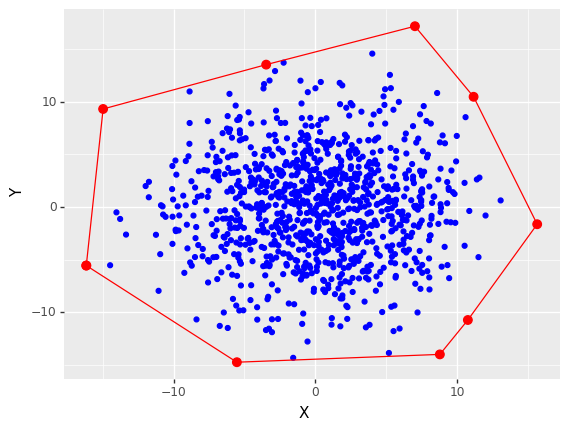

<ggplot: (8733123568336)>

In [17]:
Xress= np.array(df.X[result])
Yress= np.array(df.Y[result])
dfress = pd.DataFrame({"Xres" : Xress,"Yres" : Yress})
plnn = ggplot() + geom_point(df, aes(x='X', y='Y'), color='blue')+ geom_point(dfress, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfress, aes(x = "Xres", y = "Yres"),color = 'red')
plnn

In [18]:
def circle_points(r, n):
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles = pd.DataFrame({"X" : x,"Y" : y})
    return circles


In [19]:
np.random.seed(12)
lists = [10,20,50,100,300,500,700,1000]
timer3 = []
for j in range(len(lists)):
    k = lists[j]
    timeee3 = []
    for i in range(50):
        df = circle_points([5], [k])
        nrow = df.shape[0]
        points3 = []
        for i in range(nrow):
            points3.append(Point(df.X[i], df.Y[i]))
        tic = time.perf_counter()
        result = javis_march(points3)
        toc = time.perf_counter()
        dur = toc - tic
        timeee3.append(dur)
    timer3.append(np.mean(timeee3))

-4.698463103929543 -1.7101007166283433
-2.500000000000002 -4.330127018922192
0.8682408883346499 -4.924038765061041
3.830222215594889 -3.213938048432698
5.0 -1.2246467991473533e-15
5.0 0.0
3.83022221559489 3.2139380484326963
0.8682408883346521 4.92403876506104
-2.499999999999999 4.330127018922194
-4.698463103929542 1.7101007166283444
-4.698463103929543 -1.7101007166283433
-4.698463103929543 -1.7101007166283433
-2.500000000000002 -4.330127018922192
0.8682408883346499 -4.924038765061041
3.830222215594889 -3.213938048432698
5.0 -1.2246467991473533e-15
5.0 0.0
3.83022221559489 3.2139380484326963
0.8682408883346521 4.92403876506104
-2.499999999999999 4.330127018922194
-4.698463103929542 1.7101007166283444
-4.698463103929543 -1.7101007166283433
-4.698463103929543 -1.7101007166283433
-2.500000000000002 -4.330127018922192
0.8682408883346499 -4.924038765061041
3.830222215594889 -3.213938048432698
5.0 -1.2246467991473533e-15
5.0 0.0
3.83022221559489 3.2139380484326963
0.8682408883346521 4.9240387

-4.989726963751682 0.32035109990356614
-4.989726963751682 -0.32035109990356275
-4.9077957849553275 -0.9557931435068594
-4.745278735053344 -1.575541090118101
-4.504844339512096 -2.16941869558779
-4.190440524459204 -2.7276745060527423
-3.807229791845673 -3.241141976538941
-3.361504451306585 -3.7013899853765766
-2.86058330061085 -4.100861272984778
-2.3126914512041767 -4.432996531865
-1.7268252721065407 -4.692342110248801
-1.112604669781573 -4.874639560909118
-0.4801151295384122 -4.97689556474599
0.1602578878582743 -4.997431081003439
0.797999475166892 -4.935908917072251
1.42263793315516 -4.793339265183304
2.0239167156119646 -4.5720631150790645
2.5919628415526224 -4.275713815026732
3.117449009293667 -3.9091574123401496
3.5917467504886353 -3.4784127530174347
4.007068109339783 -2.9905526524560813
4.356593520616945 -2.453587760019693
4.634583786730108 -1.876335024396873
4.8364743151951455 -1.2682729195475417
4.958950069116231 -0.6393858084225332
5.0 -1.2246467991473533e-15
5.0 0.0
4.9589500691

-4.989726963751682 0.32035109990356614
-4.989726963751682 -0.32035109990356275
-4.9077957849553275 -0.9557931435068594
-4.745278735053344 -1.575541090118101
-4.504844339512096 -2.16941869558779
-4.190440524459204 -2.7276745060527423
-3.807229791845673 -3.241141976538941
-3.361504451306585 -3.7013899853765766
-2.86058330061085 -4.100861272984778
-2.3126914512041767 -4.432996531865
-1.7268252721065407 -4.692342110248801
-1.112604669781573 -4.874639560909118
-0.4801151295384122 -4.97689556474599
0.1602578878582743 -4.997431081003439
0.797999475166892 -4.935908917072251
1.42263793315516 -4.793339265183304
2.0239167156119646 -4.5720631150790645
2.5919628415526224 -4.275713815026732
3.117449009293667 -3.9091574123401496
3.5917467504886353 -3.4784127530174347
4.007068109339783 -2.9905526524560813
4.356593520616945 -2.453587760019693
4.634583786730108 -1.876335024396873
4.8364743151951455 -1.2682729195475417
4.958950069116231 -0.6393858084225332
5.0 -1.2246467991473533e-15
5.0 0.0
4.9589500691

-4.997482711915925 0.15863966749033828
-4.997482711915925 -0.15863966749033928
-4.977359612865423 -0.4752802165209131
-4.937194443381971 -0.7900069798667504
-4.877148934427035 -1.101552663932703
-4.7974648680724865 -1.408662784207149
-4.698463103929543 -1.7101007166283433
-4.580542287160348 -2.004652677033069
-4.444177243274617 -2.2911326086370516
-4.289917066174885 -2.568386957867032
-4.118382907149164 -2.835299319313853
-3.930265473713937 -3.0907949311030265
-3.726322248378774 -3.3338450025814574
-3.507374438531606 -3.5634708568943148
-3.274303669726426 -3.778747871771291
-3.028048435688333 -3.9788092026541606
-2.7696003193305523 -4.1628492731738564
-2.4999999999999982 -4.3301270189221945
-2.22033306302887 -4.47996887145668
-1.9317256284656434 -4.611771470522907
-1.6353398165871094 -4.725004093573341
-1.3323690684501732 -4.81921079279971
-1.0240333403259527 -4.894012231073893
-0.7115741913664262 -4.949107209404663
-0.396249784283944 -4.984273879759711
-0.07932981917403804 -4.99937063

-4.997482711915925 0.15863966749033828
-4.997482711915925 -0.15863966749033928
-4.977359612865423 -0.4752802165209131
-4.937194443381971 -0.7900069798667504
-4.877148934427035 -1.101552663932703
-4.7974648680724865 -1.408662784207149
-4.698463103929543 -1.7101007166283433
-4.580542287160348 -2.004652677033069
-4.444177243274617 -2.2911326086370516
-4.289917066174885 -2.568386957867032
-4.118382907149164 -2.835299319313853
-3.930265473713937 -3.0907949311030265
-3.726322248378774 -3.3338450025814574
-3.507374438531606 -3.5634708568943148
-3.274303669726426 -3.778747871771291
-3.028048435688333 -3.9788092026541606
-2.7696003193305523 -4.1628492731738564
-2.4999999999999982 -4.3301270189221945
-2.22033306302887 -4.47996887145668
-1.9317256284656434 -4.611771470522907
-1.6353398165871094 -4.725004093573341
-1.3323690684501732 -4.81921079279971
-1.0240333403259527 -4.894012231073893
-0.7115741913664262 -4.949107209404663
-0.396249784283944 -4.984273879759711
-0.07932981917403804 -4.99937063

-4.997482711915925 0.15863966749033828
-4.997482711915925 -0.15863966749033928
-4.977359612865423 -0.4752802165209131
-4.937194443381971 -0.7900069798667504
-4.877148934427035 -1.101552663932703
-4.7974648680724865 -1.408662784207149
-4.698463103929543 -1.7101007166283433
-4.580542287160348 -2.004652677033069
-4.444177243274617 -2.2911326086370516
-4.289917066174885 -2.568386957867032
-4.118382907149164 -2.835299319313853
-3.930265473713937 -3.0907949311030265
-3.726322248378774 -3.3338450025814574
-3.507374438531606 -3.5634708568943148
-3.274303669726426 -3.778747871771291
-3.028048435688333 -3.9788092026541606
-2.7696003193305523 -4.1628492731738564
-2.4999999999999982 -4.3301270189221945
-2.22033306302887 -4.47996887145668
-1.9317256284656434 -4.611771470522907
-1.6353398165871094 -4.725004093573341
-1.3323690684501732 -4.81921079279971
-1.0240333403259527 -4.894012231073893
-0.7115741913664262 -4.949107209404663
-0.396249784283944 -4.984273879759711
-0.07932981917403804 -4.99937063

-4.997482711915925 0.15863966749033828
-4.997482711915925 -0.15863966749033928
-4.977359612865423 -0.4752802165209131
-4.937194443381971 -0.7900069798667504
-4.877148934427035 -1.101552663932703
-4.7974648680724865 -1.408662784207149
-4.698463103929543 -1.7101007166283433
-4.580542287160348 -2.004652677033069
-4.444177243274617 -2.2911326086370516
-4.289917066174885 -2.568386957867032
-4.118382907149164 -2.835299319313853
-3.930265473713937 -3.0907949311030265
-3.726322248378774 -3.3338450025814574
-3.507374438531606 -3.5634708568943148
-3.274303669726426 -3.778747871771291
-3.028048435688333 -3.9788092026541606
-2.7696003193305523 -4.1628492731738564
-2.4999999999999982 -4.3301270189221945
-2.22033306302887 -4.47996887145668
-1.9317256284656434 -4.611771470522907
-1.6353398165871094 -4.725004093573341
-1.3323690684501732 -4.81921079279971
-1.0240333403259527 -4.894012231073893
-0.7115741913664262 -4.949107209404663
-0.396249784283944 -4.984273879759711
-0.07932981917403804 -4.99937063

3.3925470577856616 -3.672958543287666
3.6186701905253504 -3.45039505741056
3.830222215594889 -3.213938048432698
4.026351287655293 -2.964539645273201
4.206267664155906 -2.703204087277987
4.369246885348924 -2.430983680502344
4.514632691433105 -2.1489745604458594
4.641839665080363 -1.8583122783016361
4.7503555887047275 -1.5601672284924353
4.839743506981781 -1.255739935905397
4.909643486313534 -0.9462562218020487
4.959774064153977 -0.6329622678687452
4.989933382359422 -0.3171195982828226
5.0 -1.2246467991473533e-15
5.0 0.0
4.989933382359422 0.31711959828282255
4.959774064153977 0.6329622678687463
4.909643486313533 0.946256221802051
4.839743506981781 1.255739935905396
4.7503555887047275 1.5601672284924355
4.641839665080363 1.858312278301638
4.514632691433106 2.148974560445858
4.369246885348924 2.4309836805023437
4.206267664155906 2.703204087277988
4.026351287655293 2.9645396452732022
3.83022221559489 3.2139380484326963
3.6186701905253504 3.45039505741056
3.392547057785661 3.672958543287667


-4.997482711915925 0.15863966749033828
-4.997482711915925 -0.15863966749033928
-4.977359612865423 -0.4752802165209131
-4.937194443381971 -0.7900069798667504
-4.877148934427035 -1.101552663932703
-4.7974648680724865 -1.408662784207149
-4.698463103929543 -1.7101007166283433
-4.580542287160348 -2.004652677033069
-4.444177243274617 -2.2911326086370516
-4.289917066174885 -2.568386957867032
-4.118382907149164 -2.835299319313853
-3.930265473713937 -3.0907949311030265
-3.726322248378774 -3.3338450025814574
-3.507374438531606 -3.5634708568943148
-3.274303669726426 -3.778747871771291
-3.028048435688333 -3.9788092026541606
-2.7696003193305523 -4.1628492731738564
-2.4999999999999982 -4.3301270189221945
-2.22033306302887 -4.47996887145668
-1.9317256284656434 -4.611771470522907
-1.6353398165871094 -4.725004093573341
-1.3323690684501732 -4.81921079279971
-1.0240333403259527 -4.894012231073893
-0.7115741913664262 -4.949107209404663
-0.396249784283944 -4.984273879759711
-0.07932981917403804 -4.99937063

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.9997240099774185 0.05253402759468173
-4.9997240099774185 -0.052534027594680496
-4.997516272602589 -0.15757888523635016
-4.993101772727602 -0.26255416047832614
-4.986482459671331 -0.36741349919423616
-4.97766125633608 -0.47211059845201414
-4.966642057916914 -0.5765992269599693
-4.953429730181654 -0.680833245481232
-4.938030107322283 -0.7847666272075283
-4.92044998937874 -0.888353478083332
-4.900697139236208 -0.9915480570713853
-4.878780279197246 -1.094304796350653
-4.85470908713026 -1.1965783214377894
-4.828494192196037 -1.2983234712232314
-4.800147170154199 -1.399495317913081
-4.769680538251679 -1.5000491868679413
-4.737107749695455 -1.599940676329989
-4.702443187711991 -1.6991256770295378
-4.665702159196013 -1.7975603916624503
-4.626900887951411 -1.8952013542297952
-4.586056507527265 -1.9920054492312078
-4.543187053652156 -2.0879299307034804
-4.498311456270089 -2.182932441095983
-4.45144953118157 -2.2769710299745536
-4.4026219712935 -2.3700041725456384
-4.351850337481774 -2.4619907

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999900908311601 0.031478676351180616
-4.999900908311601 -0.031478676351177175
-4.999108198370249 -0.09443103826269117
-4.997522904167843 -0.1573684285929305
-4.9951452770450615 -0.2202808689251421
-4.991975693963106 -0.28315838479827166
-4.988014657443939 -0.34599100728836985
-4.983262795490613 -0.4087687745891078
-4.9777208614877 -0.4714817335911867
-4.971389734081849 -0.5341199414603479
-4.96427041704248 -0.5966734672137539
-4.956364039102642 -0.6591323932945113
-4.947671853780054 -0.7214868171440416
-4.938195239178374 -0.7837268527720888
-4.927935697768698 -0.8458426323240852
-4.916894856151356 -0.907824307645666
-4.905074464798023 -0.9696620518440389
-4.892476397774185 -1.0313460608459835
-4.879102652442024 -1.0928665549522532
-4.8649553491437345 -1.1542137803880892
-4.850036730865362 -1.215378010849639
-4.83434916288119 -1.2763495490460057
-4.817895132378726 -1.3371187282367194
-4.800677248064382 -1.3976759137643449
-4.782698239749871 -1.458011504582003
-4.763960957919414 -1.51

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.999949500779842 0.02247197480007956
-4.999949500779842 -0.022471974800073895
-4.999545513138963 -0.067414108701872
-4.998737570498737 -0.1123507956553095
-4.997525738139593 -0.15727840485048775
-4.995910113975579 -0.2021933062109693
-4.99389082854645 -0.2470918706870953
-4.991468045007128 -0.291970470549198
-4.98864195911451 -0.3368254796807173
-4.985412799211656 -0.3816532738711851
-4.981780826209342 -0.42645023110905556
-4.97774633356497 -0.4712127318743573
-4.973309647258867 -0.5159371594311453
-4.968471125767941 -0.5606199001197263
-4.963231160036715 -0.6052573436486373
-4.957590173445745 -0.6498458833863505
-4.951548621777407 -0.6943819166526838
-4.945106993179074 -0.7388618450098906
-4.938265808123669 -0.7832820745534087
-4.931025619367617 -0.8276390162022406
-4.923387011906182 -0.8719290859889461
-4.915350602926199 -0.9161487053492208
-4.906917041756207 -0.9602943014110381
-4.898087009813985 -1.0043623072833312
-4.888861220551492 -1.0483491623441927
-4.8792404193972265 -1.092

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.99997527658723 0.01572366103868344
-4.99997527658723 -0.015723661038679993
-4.999777490752055 -0.04717036112948179
-4.999381926905592 -0.07861519528520282
-4.998788600695303 -0.11005691963113547
-4.997997535591608 -0.14149429041558795
-4.997008762886957 -0.1729260640590839
-4.995822321694589 -0.20435099720355726
-4.994438258946989 -0.2357678467615275
-4.99285662939403 -0.2671753699652861
-4.991077495600805 -0.29857232441604825
-4.989100927945154 -0.3299574681331011
-4.9869270046148815 -0.36132955960293345
-4.98455581160466 -0.39268735782834635
-4.981987442712633 -0.4240296223775441
-4.979221999536698 -0.45535511343320206
-4.9762595914704955 -0.48666259184151095
-4.973100335699074 -0.5179508191611941
-4.969744357194262 -0.5492185577124975
-4.966191788709715 -0.5804645706261484
-4.9624427707756755 -0.6116876218922853
-4.958497451693404 -0.6428864764093424
-4.954355987529318 -0.67405990003292
-4.950018542108819 -0.7052066596245954
-4.945485287009807 -0.7363255231007043
-4.9407564015558

-4.698463103929543 -1.7101007166283433
-2.500000000000002 -4.330127018922192
0.8682408883346499 -4.924038765061041
3.830222215594889 -3.213938048432698
5.0 -1.2246467991473533e-15
5.0 0.0
3.83022221559489 3.2139380484326963
0.8682408883346521 4.92403876506104
-2.499999999999999 4.330127018922194
-4.698463103929542 1.7101007166283444
-4.698463103929543 -1.7101007166283433


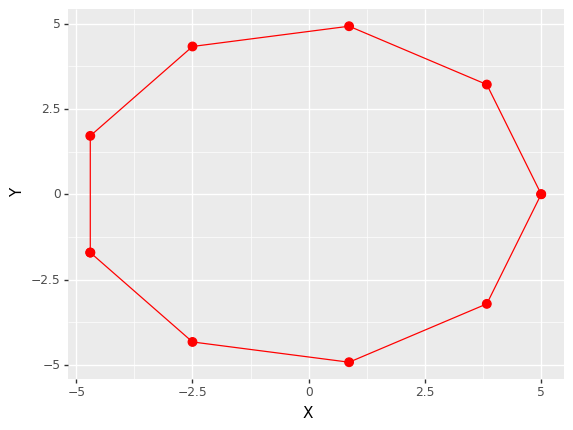

<ggplot: (8733123628921)>

In [20]:
circles = circle_points([5], [10])
nrow = circles.shape[0]
pointsc = []
for i in range(nrow):
    pointsc.append(Point(circles.X[i], circles.Y[i]))
result = javis_march(pointsc)
Xress= np.array(circles.X[result])
Yress= np.array(circles.Y[result])
dfress = pd.DataFrame({"Xres" : Xress,"Yres" : Yress})
plnn = ggplot() + geom_point(circles, aes(x='X', y='Y'), color='blue')+ geom_point(dfress, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfress, aes(x = "Xres", y = "Yres"),color = 'red')
plnn

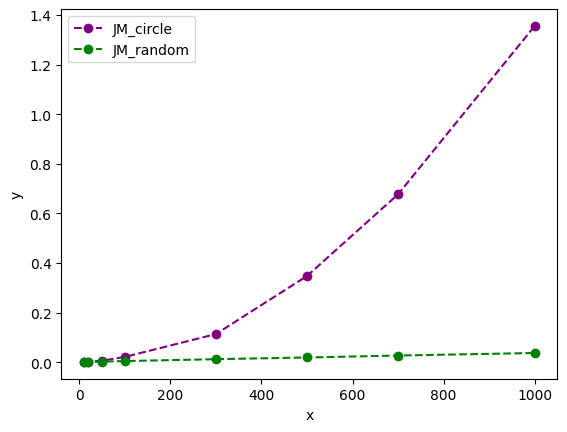

In [21]:
plt.plot(lists,timer3,'--o',color='purple',label='JM_circle')
plt.plot(lists,timer2,'--o',color='green', label='JM_random')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")

We could see from the plot that the computational complexity is increasing much faster (quadratic) in the case of points located on the circle boundary, since the h is much larger than when points are randomly generated (linear).

## Special Test Cases

When testing the Javis March algorithm, there are a few special cases (input points set) that might require further consideration. The following are the pathological cases that were considered when writing and modifying my Javis March algorithm.

### Case 1
#### Points containing collinear points (multiple points in a line)
In geometry, we define the convex hull of a shape which is the smallest convex set that contains all the points, using the definition when there's colinear points ($\geq$ 3) in the input points sets, and all the collinear points are on the convex hull boundary, we only select the two on the ends, the following is an example where we have 6 points in the input set, within which 5 of them ((1,1),(2,2),(3,3),(4,4),(5,5)) are collinear and on the boundary of the convex hull, we only pick the ends points ((1,1),(5,5)) as the convex hull points set on that boundary:

1 1
6 3
5 5
1 1


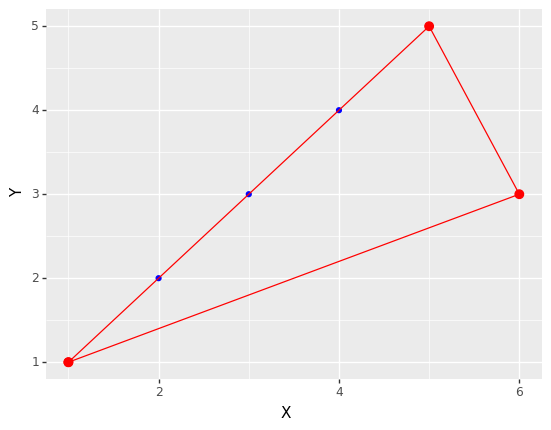

<ggplot: (8733123478625)>

In [22]:
pointstest1 = []
pointstest1.append(Point(1,1))
pointstest1.append(Point(2,2))
pointstest1.append(Point(3,3))
pointstest1.append(Point(4,4))
pointstest1.append(Point(5,5))
pointstest1.append(Point(6,3))
resulttest1 = javis_march(pointstest1)
x = []
y = []
n = len(pointstest1)
for i in range(n):
    x.append(pointstest1[i].x)
    y.append(pointstest1[i].y)
df = pd.DataFrame({"X": x, "Y": y})
Xres= np.array(df.X[resulttest1])
Yres= np.array(df.Y[resulttest1])
dfres = pd.DataFrame({"Xres" : Xres,"Yres" : Yres})
pln = ggplot() + geom_point(df, aes(x='X', y='Y'), color='blue')+ geom_point(dfres, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfres, aes(x = "Xres", y = "Yres"),color = 'red')
pln

### Case 2
#### Points containing less than three points:
In mathematics, a plane is a Euclidean two-dimensional surface, we need at least 3 points to define a plane. Therefore, in my algorithm, when the input points set has less than three points, it will give an error message:
(One can also define that all the points in points set with only one or two points are in the convex hull set)

In [23]:
pointstest2 = []
pointstest2.append(Point(1,1))
resulttest2 = javis_march(pointstest2)

The number of the points are not enough to form a convex hull!


### Case 3
#### Points containing multiple points with same minimum x-axis value:
Another special case is when initiating our algorithm, we search for the point with minimum x-axis value, but in the cases when we have multiple points with same minimum x-axis value, we start from the one with the highest y-value, we can see from the output of the following case that the convex hull points start from the (1,3), which has the maximum y-value with same x-axis value as ((1,1)(1,2)):

1 3.0
1 1.0
5 2.0
4 3.0
1 3.0


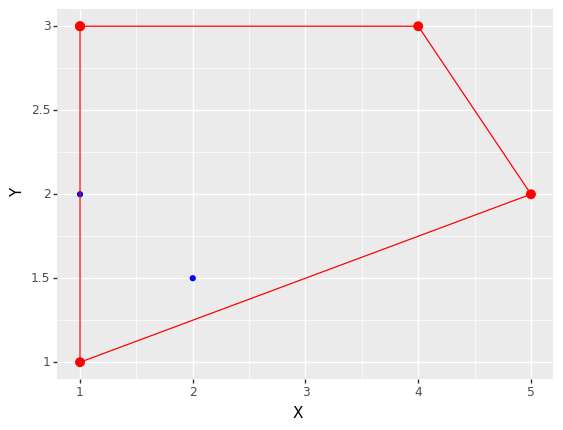

<ggplot: (8733123439424)>

In [24]:
pointstest3 = []
pointstest3.append(Point(1,1))
pointstest3.append(Point(1,2))
pointstest3.append(Point(1,3))
pointstest3.append(Point(4,3))
pointstest3.append(Point(5,2))
pointstest3.append(Point(2,1.5))
resulttest3 = javis_march(pointstest3)
x = []
y = []
n = len(pointstest3)
for i in range(n):
    x.append(pointstest3[i].x)
    y.append(pointstest3[i].y)
df = pd.DataFrame({"X": x, "Y": y})
Xres= np.array(df.X[resulttest3])
Yres= np.array(df.Y[resulttest3])
dfres = pd.DataFrame({"Xres" : Xres,"Yres" : Yres})
pln = ggplot() + geom_point(df, aes(x='X', y='Y'), color='blue')+ geom_point(dfres, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfres, aes(x = "Xres", y = "Yres"),color = 'red')
pln

### Case 4
#### Points containing repeated input points:
The final special case we considered is when the input points set has repeated points, this may cause a problem when calculating the counter-clockwise orientation of points. since we are looking for the minimum number of points (smallest convex set) that contains all the points, we could drop the duplicate, and this step is written within the algorithm using a function I defined called 'uniquee'. The following is an example where points (1,1) and (2,2) appeared twice in the input points set, and using the Javis March algorithm written above, it successfully detect the right convex hull set. One thing to notice is that one of the return object from the function is the index number of the points which are the convex hull set, in the cases where we have repeated points, the index number refer to the points set which is the set after dropping the duplicates instead of the original input points set:

1.0 1.0
3.0 1.0
3.0 3.0
1.0 1.0


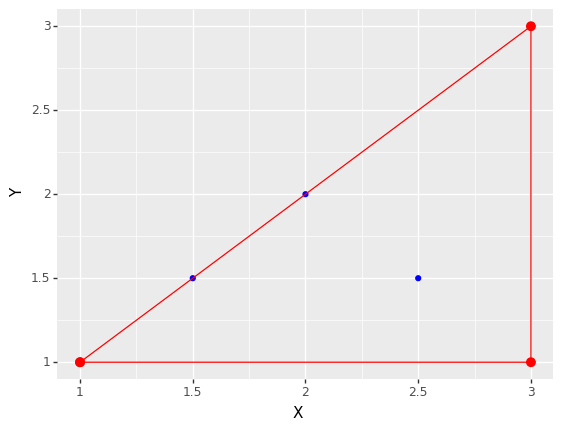

<ggplot: (8733123362295)>

In [25]:
pointstest4 = []
pointstest4.append(Point(1,1))
pointstest4.append(Point(2,2))
pointstest4.append(Point(3,3))
pointstest4.append(Point(1,1))
pointstest4.append(Point(2,2))
pointstest4.append(Point(1.5,1.5))
pointstest4.append(Point(3,1))
pointstest4.append(Point(2.5,1.5))
resulttest4 = javis_march(pointstest4)
pointstest4u = uniquee(pointstest4,len(pointstest4))
x = []
y = []
n = len(pointstest4u)
for i in range(n):
    x.append(pointstest4u[i].x)
    y.append(pointstest4u[i].y)
df = pd.DataFrame({"X": x, "Y": y})
Xres= np.array(df.X[resulttest4])
Yres= np.array(df.Y[resulttest4])
dfres = pd.DataFrame({"Xres" : Xres,"Yres" : Yres})
pln = ggplot() + geom_point(df, aes(x='X', y='Y'), color='blue')+ geom_point(dfres, aes(x="Xres", y="Yres"),color='red', size=3) + geom_path(dfres, aes(x = "Xres", y = "Yres"),color = 'red')
pln